In [22]:
!pip install -r requirments.txt

1. Import Dependencies

In [23]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

2. Basic Processing

In [24]:
df = pd.read_csv('data/processed/ChurnModelling_Missing_values_handled.csv')
df.head(5)

,Unnamed: 0,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,619,France,Female,42.00,2,0.00,1,1,1,101348.88,1
1,1,608,Spain,Female,41.00,1,83807.86,1,0,1,112542.58,0
2,2,502,France,Female,42.00,8,159660.80,3,1,0,113931.57,1
3,3,699,France,Female,38.91,1,0.00,2,0,0,93826.63,0
4,4,850,Spain,Female,43.00,2,125510.82,1,1,1,79084.10,0


Outlier Detection Techniques

Distribution Plots

In [25]:
categorical_columns = [
    'Geography', 'Gender', 'HasCrCard','IsActiveMember','Exited'
]

numerical_columns=[
    'Age','Tenure','CreditScore','Balance','EstimatedSalary','NumOfProducts'
]

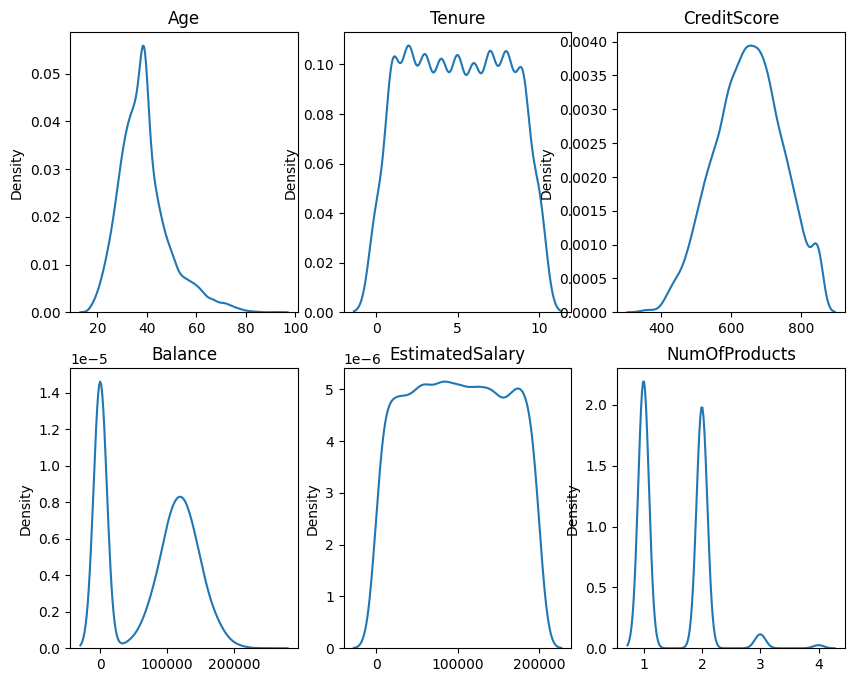

In [26]:
fig, axes = plt.subplots(2, 3, figsize=(10,8))
axes = axes.flatten()

for idx, col in enumerate(numerical_columns):
    sns.kdeplot(
        data=df[col],
        ax=axes[idx]
    )
    axes[idx].set_title(col)
    axes[idx].set_xlabel('')

plt.show()

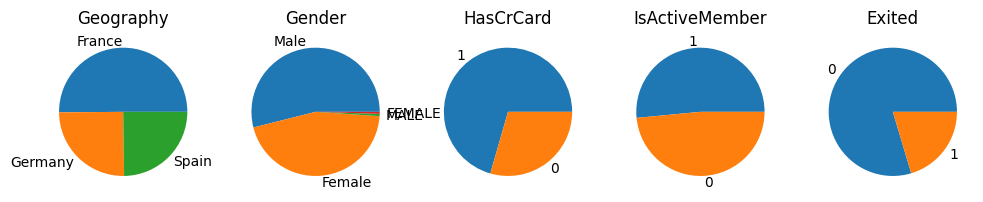

In [27]:
fig, axes = plt.subplots(1, 5, figsize=(12,8))

for idx, col in enumerate(categorical_columns):
    df[col].value_counts().plot(
        kind='pie',
        ax=axes[idx]
    )

    axes[idx].set_title(col)
    axes[idx].set_ylabel('')
plt.show()

3.2 Box Plots

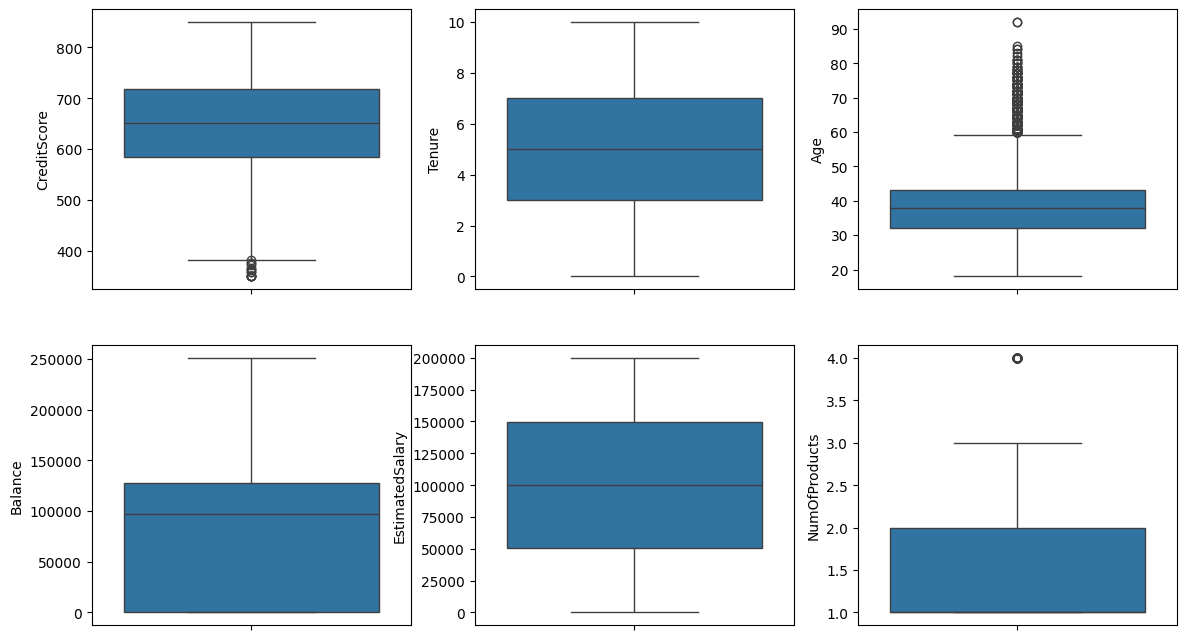

In [28]:
numerical_columns=[
    'Age','Tenure','CreditScore','Balance','EstimatedSalary','NumOfProducts'
]

fig, axes = plt.subplots(2, 3, figsize=(14,8))

sns.boxplot(data=df['CreditScore'],ax=axes[0,0])
sns.boxplot(data=df['Tenure'],ax=axes[0,1])
sns.boxplot(data=df['Age'],ax=axes[0,2])
sns.boxplot(data=df['Balance'],ax=axes[1,0])
sns.boxplot(data=df['EstimatedSalary'],ax=axes[1,1])
sns.boxplot(data=df['NumOfProducts'],ax=axes[1,2])

plt.show()

3.3 Empirical Rule /3-sigma Rule

In [29]:
def find_anomaly(data):

    mean = data.mean()
    std = data.std()

    upper_bound = mean + (3 * std)
    lower_bound = mean + (3 * std)

    return (data > upper_bound) | (data < lower_bound)

In [30]:
numerical_columns = [
    'Age', 'Tenure', 'CreditScore', 'Balance', 'EstimatedSalary' 
]

for col in numerical_columns:
    n_outliers = find_anomaly(df[col]).sum()
    n_outlier_percentage = round(n_outliers / len(df),3)
    print(f"{col} : {n_outliers} outliers")

Age : 10000 outliers
Tenure : 10000 outliers
CreditScore : 10000 outliers
Balance : 10000 outliers
EstimatedSalary : 10000 outliers


3.4 IQR Method

In [31]:
def find_anomaly(data):
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)

    IQR = Q3 - Q1

    upper_bound = Q3 + 1.5 * IQR
    lower_bound = Q1 - 1.5 * IQR

    return (data > upper_bound) | (data < lower_bound)

In [32]:
numerical_columns = [
    'Age', 'Tenure', 'CreditScore', 'Balance', 'EstimatedSalary' 
]

for col in numerical_columns:
    n_outliers = find_anomaly(df[col]).sum()
    n_outlier_percentage = round(n_outliers / len(df),3)
    print(f"{col} : {n_outliers} outliers")

Age : 501 outliers
Tenure : 0 outliers
CreditScore : 15 outliers
Balance : 0 outliers
EstimatedSalary : 0 outliers


axis=1 sums horizontally the number in each of the columns

In [33]:
outlier_mask_log = pd.DataFrame()
for col in numerical_columns:
    outlier_mask_log[col] = find_anomaly(df[col])

outlier_count = outlier_mask_log.sum(axis=1)
outlier_mask_log['Outlier Count'] = outlier_count
outlier_mask_log = outlier_mask_log[outlier_mask_log['Outlier Count']==2]
outlier_mask_log

,Age,Tenure,CreditScore,Balance,EstimatedSalary,Outlier Count
8762,True,False,True,False,False,2


In [34]:
df.to_csv('data/processed/ChurnModelling_Outliers_Handled.csv', index=False)
df.head(5)

,Unnamed: 0,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,619,France,Female,42.00,2,0.00,1,1,1,101348.88,1
1,1,608,Spain,Female,41.00,1,83807.86,1,0,1,112542.58,0
2,2,502,France,Female,42.00,8,159660.80,3,1,0,113931.57,1
3,3,699,France,Female,38.91,1,0.00,2,0,0,93826.63,0
4,4,850,Spain,Female,43.00,2,125510.82,1,1,1,79084.10,0


In [35]:
print(df.columns)
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df.to_csv('data/processed/ChurnModelling_Outliers_Handled.csv', index=False)


Index(['Unnamed: 0', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited'],
      dtype='str')
